## FIFA 2018 Data Analysis

<b>Import Library Required for EDA and set the path of the datafile

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
import os
os.chdir(r'/Users/a0s04np/ML/FoundProj/')


<b>Read the datafile 

In [3]:
df = pd.read_excel('FIFA.xlsx')
df.head()
df.shape

(17981, 74)

<b>Check if the data has NA in it

In [4]:
df.isna().sum()


Unnamed: 0        0
Name              0
Age               0
Photo             0
Nationality       0
               ... 
RM             2029
RS             2029
RW             2029
RWB            2029
ST             2029
Length: 74, dtype: int64

Clearly shows that there are exactaly same number of rows in skill column which may be because the player is a goalkeeper, So lets check how many goalkeepers are there in the data

In [5]:
(df['Preferred Positions'] == 'GK ').value_counts()


False    15952
True      2029
Name: Preferred Positions, dtype: int64

Number of NA are same as the count of goalkeepers which means our assumption is right and there is no problem in data.
Now, lets fill the NA values with 0

In [6]:
df.fillna(0)

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. SuÃ¡rez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,17976,A. Kelsey,17,https://cdn.sofifa.org/48/18/players/237463.png,England,https://cdn.sofifa.org/flags/14.png,46,63,Scunthorpe United,https://cdn.sofifa.org/24/18/teams/1949.png,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17977,17977,B. Richardson,47,https://cdn.sofifa.org/48/18/players/11728.png,England,https://cdn.sofifa.org/flags/14.png,46,46,Wycombe Wanderers,https://cdn.sofifa.org/24/18/teams/1933.png,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17978,17978,J. Young,17,https://cdn.sofifa.org/48/18/players/231381.png,Scotland,https://cdn.sofifa.org/flags/42.png,46,61,Swindon Town,https://cdn.sofifa.org/24/18/teams/1934.png,...,31.0,28.0,38.0,29.0,45.0,42.0,45.0,44.0,32.0,45.0
17979,17979,J. Lundstram,18,https://cdn.sofifa.org/48/18/players/238813.png,England,https://cdn.sofifa.org/flags/14.png,46,64,Crewe Alexandra,https://cdn.sofifa.org/24/18/teams/121.png,...,47.0,46.0,45.0,47.0,43.0,45.0,41.0,44.0,46.0,41.0


<b>Further Analysis and cleaning of the data

In [7]:
df.Nationality.nunique() #Check how many countries are in Data


165

In [8]:
#Unnamed column seems to be the count(Index) but starting from 0, lets change the name of column and also make it start from 1
df.rename(columns= {"Unnamed: 0": "id"}, inplace= True) 
df['id'] = df['id'] + 1
df.head()

,id,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,1,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,2,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,3,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,4,L. SuÃ¡rez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,5,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Since We don't required Photo, Flag and club logo for analysis so dropping these columns
df.drop(columns= ['Photo', 'Flag', 'Club Logo'], inplace= True)
df

,id,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,1,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95.5M,565K,2228,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,2,L. Messi,30,Argentina,93,93,FC Barcelona,105M,565K,2154,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,3,Neymar,25,Brazil,92,94,Paris Saint-Germain,123M,280K,2100,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,4,L. SuÃ¡rez,30,Uruguay,92,92,FC Barcelona,97M,510K,2291,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,5,M. Neuer,31,Germany,92,92,FC Bayern Munich,61M,230K,1493,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,17977,A. Kelsey,17,England,46,63,Scunthorpe United,50K,1K,755,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17977,17978,B. Richardson,47,England,46,46,Wycombe Wanderers,0,1K,832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17978,17979,J. Young,17,Scotland,46,61,Swindon Town,60K,1K,1194,...,31.0,28.0,38.0,29.0,45.0,42.0,45.0,44.0,32.0,45.0
17979,17980,J. Lundstram,18,England,46,64,Crewe Alexandra,60K,1K,1302,...,47.0,46.0,45.0,47.0,43.0,45.0,41.0,44.0,46.0,41.0


In [10]:
#Simultenously there are more then on space saperated values in Prefered Position
df['Preferred Positions'].unique()


array(['ST LW ', 'RW ', 'LW ', 'ST ', 'GK ', 'CDM CM ', 'CB ',
       'RM CM CAM ', 'RM LW ST LM ', 'ST CAM ', 'LW RW ST ',
       'CDM CAM CM ', 'RW CAM ', 'RW RM ', 'CM CDM ', 'LM RM CAM ', 'LB ',
       'CM ', 'LM CM CAM ', 'LM CM ', 'LM RM CAM CM ', 'CM CB LB ',
       'LM LB ', 'ST CAM RW CF ', 'CAM LW ', 'LW ST LM ', 'CAM CM ',
       'CDM CB ', 'ST LW CF ', 'CAM CDM CM ', 'LW LM ', 'RM LM ', 'CDM ',
       'LM RW RM ', 'LB RB CB ', 'LW RW ', 'LW LM RM CAM ', 'RM ',
       'LM CF CAM ', 'RB ', 'LM CAM LW ', 'LM RM CM ', 'CAM LM ',
       'CAM RM RW ', 'RM CAM ', 'CAM LW RW ', 'LM ', 'LM CAM ',
       'CAM CF ST ', 'CM CB CDM ', 'RW ST ', 'RW LW CM ', 'CF CAM ',
       'LW CM ', 'RWB RB ', 'CAM ', 'ST CF ', 'LM ST ', 'CM CAM ',
       'CF ST ', 'CB RB ', 'CF CM CAM ', 'LM CAM RW LW ', 'LM RM ',
       'LM RW LW ', 'LM CF RM ', 'CAM LW CM ', 'ST LM ', 'LM ST RM ',
       'RM RW ', 'RM CM ', 'RB CB ', 'CM RW RB ', 'LM RM RW ', 'RW LW ',
       'CM CDM CB ', 'LB CB ', 'ST RM LM ', 'C

In [11]:
#Add new column for preferred position and store the first space saperated values as most prefered position
df['Position'] = df['Preferred Positions'].str.split().str[0]


In [12]:
#Also there is K written in the column wage so lets just convert that into float for better analysis and visualization
df.Wage = (df.Wage.str.replace('K', '000').astype(float))
df.Wage


0        565000.0
1        565000.0
2        280000.0
3        510000.0
4        230000.0
           ...   
17976      1000.0
17977      1000.0
17978      1000.0
17979      1000.0
17980      1000.0
Name: Wage, Length: 17981, dtype: float64

<b>1. (a)Making an ordered list of top 10 countries with most players

In [13]:
lst_top_countries = df.groupby('Nationality')['id'].count().sort_values(ascending=False).rank(method = 'max').head(10)
lst_top_countries

Nationality
England        165.0
Germany        164.0
Spain          163.0
France         162.0
Argentina      161.0
Brazil         160.0
Italy          159.0
Colombia       158.0
Japan          157.0
Netherlands    156.0
Name: id, dtype: float64

<b>1. (b)List 5 countries with most number of players playing at this level

In [14]:
df.groupby('Nationality')['id'].count().sort_values(ascending=False).head(5)


Nationality
England      1630
Germany      1140
Spain        1019
France        978
Argentina     965
Name: id, dtype: int64

<b>Age VS Potential

In [27]:


sub_Overall = df[['Age','Overall']]
sub_Overall = sub_Overall.groupby('Age').median().T
sub_Overall



Age,16,17,18,19,20,21,22,23,24,25,...,35,36,37,38,39,40,41,43,44,47
Overall,58.0,55.5,57.0,59.0,61.0,63.0,64.0,66.0,67.0,68.0,...,69.0,69.0,70.0,70.0,67.5,69.0,67.0,55.0,70.5,46.0


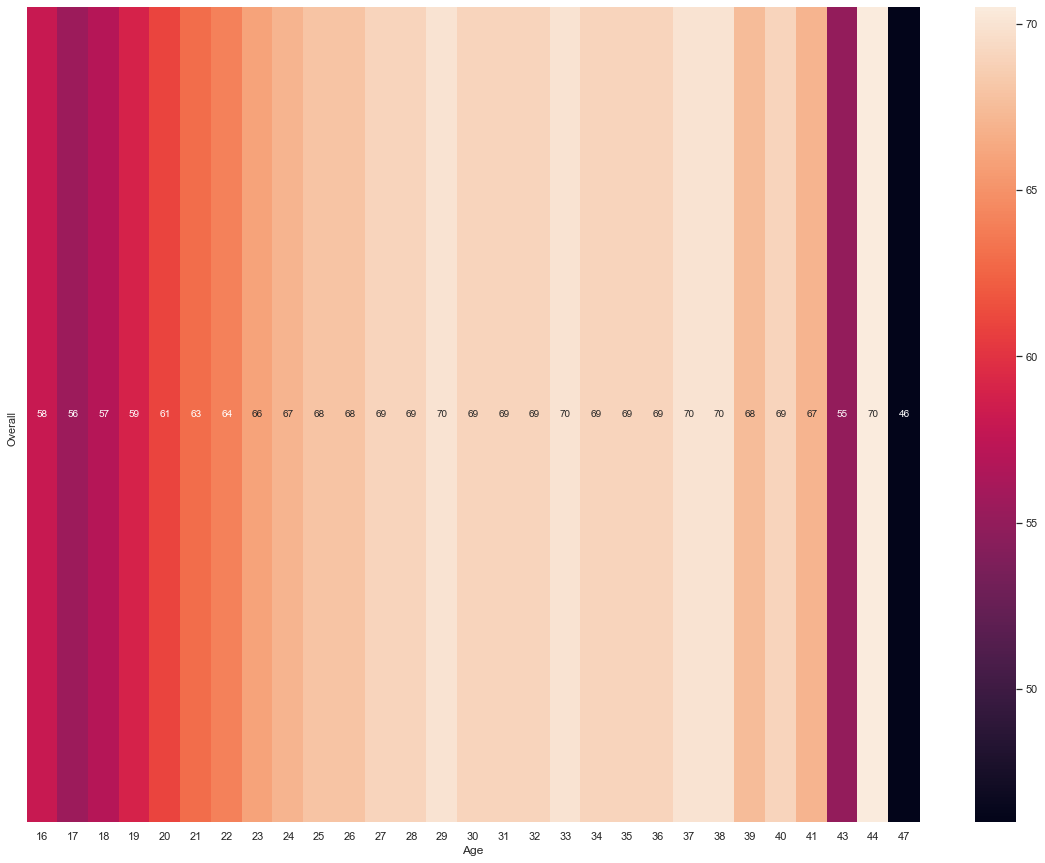

In [33]:
plt.figure(figsize=(20,15))

sns.heatmap(sub_Overall, annot=True)

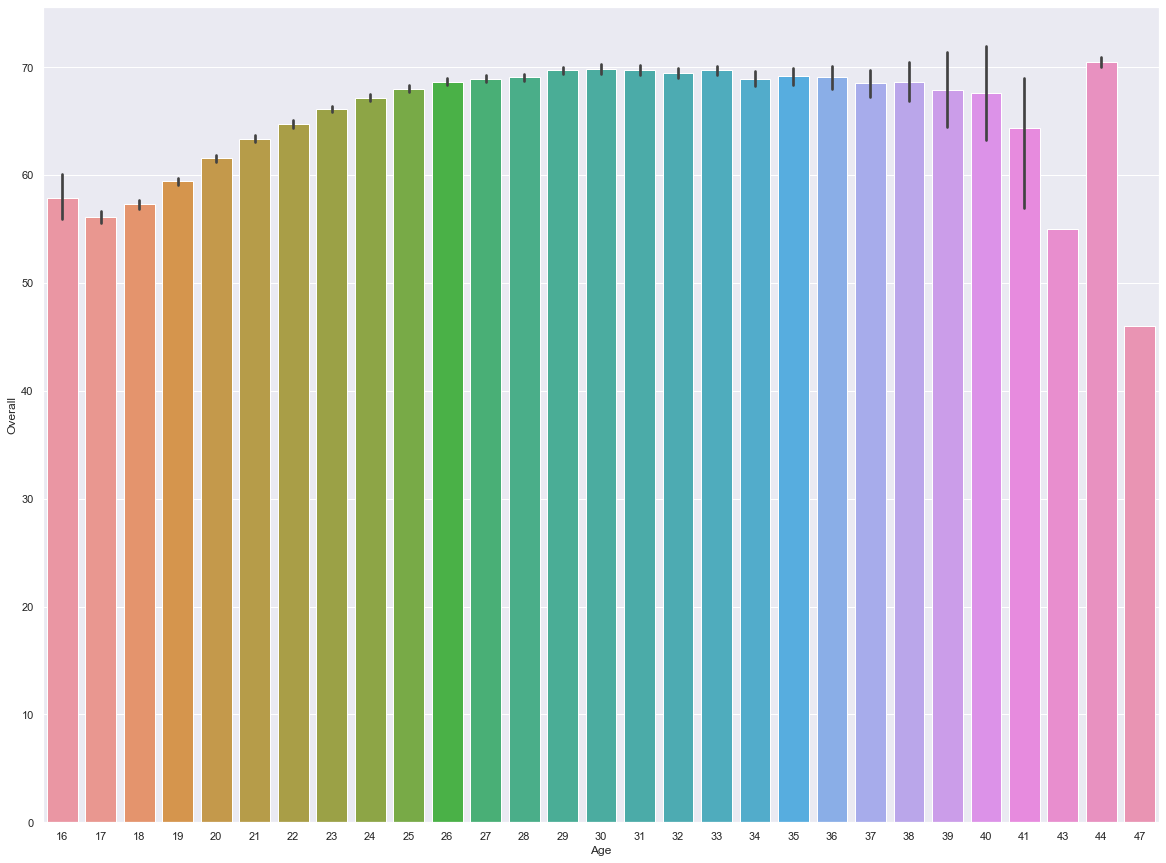

In [18]:
plt.figure(figsize=(20,15))
sns.barplot(x = df['Age'], y = df['Overall'] ) 

<b>Above visualization and mean clearly states that the Overall stops increasing after Age of 29

<b>3. Scatterplot for the analysis of wage with Striker, Left Winger or Right Winger

In [38]:
df_wage_Offensive = df[(df['Position'].isin (['ST','RW', 'LW']))]
df_wage_Offensive

,id,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Position
0,1,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95.5M,565000.0,2228,...,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,ST
1,2,L. Messi,30,Argentina,93,93,FC Barcelona,105M,565000.0,2154,...,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,RW
2,3,Neymar,25,Brazil,92,94,Paris Saint-Germain,123M,280000.0,2100,...,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,LW
3,4,L. SuÃ¡rez,30,Uruguay,92,92,FC Barcelona,97M,510000.0,2291,...,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,ST
5,6,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,92M,355000.0,2143,...,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0,ST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17948,17949,R. Roache,17,Republic of Ireland,48,69,Blackpool,70K,1000.0,1178,...,27.0,38.0,29.0,45.0,43.0,47.0,44.0,32.0,47.0,ST
17969,17970,F. Prohart,18,Austria,47,67,Wolfsberger AC,60K,1000.0,1238,...,27.0,41.0,31.0,48.0,47.0,46.0,49.0,35.0,46.0,ST
17971,17972,R. White,18,England,47,65,Bolton Wanderers,60K,2000.0,1265,...,32.0,42.0,33.0,49.0,46.0,52.0,47.0,34.0,52.0,ST
17978,17979,J. Young,17,Scotland,46,61,Swindon Town,60K,1000.0,1194,...,28.0,38.0,29.0,45.0,42.0,45.0,44.0,32.0,45.0,ST


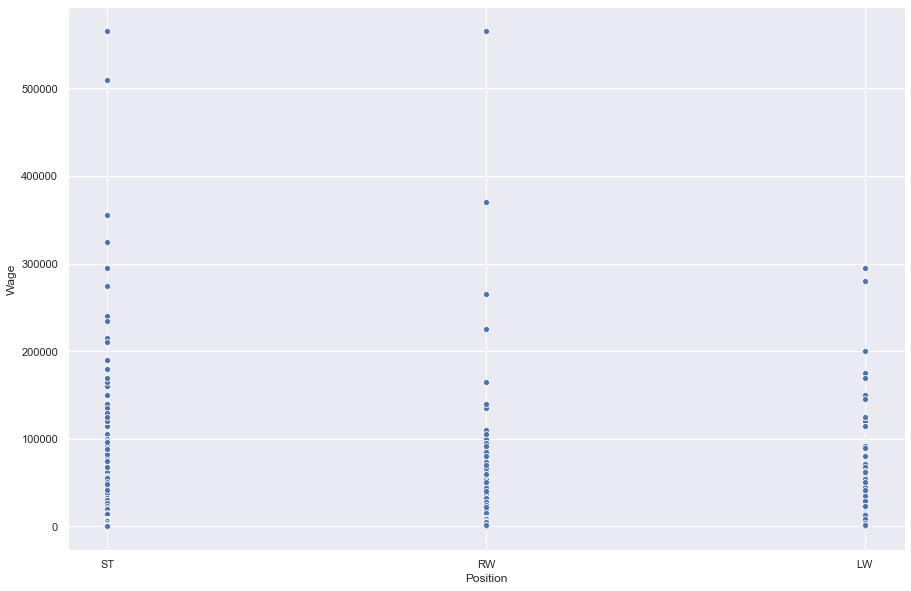

In [42]:
plt.figure(figsize=(15,10))
sns.scatterplot(x = df_wage_Offensive['Position'], y = df_wage_Offensive['Wage'])

Clearly shows that the max wages of striker and Left Winger is almost same while Left Winger's wage is comparatively low.
Mean Wage of Striker is more than other two.

<B>4. Top 5 players for every prefered position
   1. Based on Overall

In [197]:
df[['Position', 'Overall', 'Name']].sort_values('Overall', ascending=False).groupby('Position').head(5).sort_values(['Position', 'Overall'], ascending=False)

,Position,Overall,Name
0,ST,94,Cristiano Ronaldo
3,ST,92,L. SuÃ¡rez
5,ST,91,R. Lewandowski
9,ST,90,G. HiguaÃ­n
16,ST,89,S. AgÃ¼ero
...,...,...,...
65,CAM,86,Cesc FÃ bregas
59,CAM,86,R. Nainggolan
54,CAM,86,Coutinho
114,CAM,84,Willian


<b> 2. Based on Potential

In [198]:
df[['Position', 'Potential', 'Name']].sort_values('Potential', ascending=False).groupby('Position').head(5).sort_values(['Position', 'Potential'], ascending=False)

,Position,Potential,Name
0,ST,94,Cristiano Ronaldo
127,ST,94,K. MbappÃ©
19,ST,93,P. Dybala
299,ST,92,Gabriel Jesus
3,ST,92,L. SuÃ¡rez
...,...,...,...
128,CAM,92,O. DembÃ©lÃ©
394,CAM,90,Y. Tielemans
54,CAM,89,Coutinho
133,CAM,88,JoÃ£o MÃ¡rio


<b>5. The club with maximum players from England

In [199]:
df[df.Nationality == 'England'].groupby(by=['Club', 'Nationality'])['id'].count().sort_values(ascending=False).head(1)


Club              Nationality
Bolton Wanderers  England        24
Name: id, dtype: int64

<b>The club with maximum players from Spain

In [200]:
df[df.Nationality == 'Spain'].groupby(by=['Club', 'Nationality'])['id'].count().sort_values(ascending=False).head(1)

Club        Nationality
CA Osasuna  Spain          27
Name: id, dtype: int64

<b>The club with maximum players from Germany

In [201]:
df[df.Nationality == 'Germany'].groupby(by=['Club', 'Nationality'])['id'].count().sort_values(ascending=False).head(1)

Club           Nationality
Holstein Kiel  Germany        26
Name: id, dtype: int64

<B>6. Team Comparison
    Prepare the data first as we have to convert the positions in terms of Goalkeeper, Defender, Midfielder and           Forward

In [202]:
df['form_position'] = df['Position']
df['form_position'].unique()

array(['ST', 'RW', 'LW', 'GK', 'CDM', 'CB', 'RM', 'CM', 'LM', 'LB', 'CAM',
       'RB', 'CF', 'RWB', 'LWB'], dtype=object)

In [203]:
df['form_position'] = df['form_position'].replace({'GK': 'Goalkeeper'}) # Replace for GoalKeeper
df['form_position'] = df['form_position'].replace({'LB':'Defender', 'LWB': 'Defender', 'CB': 'Defender', 'RB':'Defender', 'RWB': 'Defender'})
df['form_position'] = df['form_position'].replace({'LM':'Midfielder', 'CDM': 'Midfielder', 'CM': 'Midfielder', 'CAM':'Midfielder', 'RM': 'Midfielder'})
df['form_position'] = df['form_position'].replace({'LW':'Forwards', 'ST': 'Forwards', 'CF': 'Forwards', 'RW':'Forwards'})
#Above could be done by lambda function or in one line but I prefered it in more descriptive way for my own understanding purpose

df['form_position'].unique()

array(['Forwards', 'Goalkeeper', 'Midfielder', 'Defender'], dtype=object)

Since we are going to select team multiple time using same formation so it better to write a function to select a team according to the formation.

In [43]:
def return_formation(country):
    df_temp = df[(df.Nationality == country )& (df.Overall > 75)]#[['Name', 'Age', 'Nationality', 'Overall', 'Potential',  'Preferred Positions', 'form_position', 'Position']]
    #Define the pattern based on the explaination given in the project description
    pattern_formation = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'RM|RW', 'ST|CF', 'LM|LW']
    df_return = pd.DataFrame()
    for position in pattern_formation:
        #print(f'************************************poosition: {position}')
        df_return = df_return.append(df_temp.loc[df_temp[df_temp['Position'].str.contains(position)]['Overall'].idxmax()], ignore_index= True)
        #print(f'finding position:{position} and df is {df_return}')
        #print(f'return row: {df_temp.loc[df_temp[df_temp["Preferred Positions"].str.contains(position)]["Overall"].idxmax()]}')
        df_temp.drop(df_temp[df_temp["Position"].str.contains(position)]["Overall"].idxmax(), inplace = True)
    return df_return
    

Selecting the best team for England

In [50]:
df_england = return_formation(country='England')#.sort_values(by='form_position')

df_england.Overall.mean()
df_england.describe().T

,count,mean,std,min,25%,50%,75%,max
Acceleration,11.0,72.636364,7.749487,59.0,69.0,73.0,77.0,86.0
Age,11.0,25.818182,3.280798,21.0,23.0,26.0,28.0,31.0
Aggression,11.0,74.545455,16.812874,28.0,73.5,78.0,84.0,90.0
Agility,11.0,67.909091,9.342960,50.0,62.5,70.0,73.0,83.0
Balance,11.0,60.363636,14.382439,32.0,54.5,62.0,71.5,76.0
...,...,...,...,...,...,...,...,...
Strength,11.0,77.181818,8.588576,61.0,72.5,77.0,84.0,88.0
Vision,11.0,69.636364,13.522372,42.0,61.0,73.0,81.5,83.0
Volleys,11.0,57.545455,17.282151,19.0,49.5,61.0,72.0,76.0
Wage,11.0,119090.909091,26120.698863,85000.0,102000.0,115000.0,132500.0,165000.0


In [206]:
df_germany = return_formation(country='Germany').sort_values(by='form_position')
df_germany.Overall.mean()


86.27272727272727

In [207]:
df_france = return_formation(country='France').sort_values(by='form_position')
df_france.Overall.mean()


84.63636363636364

In [208]:
df_italy = return_formation(country='Italy').sort_values(by='form_position')
df_italy.Overall.mean()



84.18181818181819

In [209]:
df_spain = return_formation(country='Spain').sort_values(by='form_position')
df_spain.Overall.mean()


86.63636363636364

Clearly spain team has better overall as a team.